In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import GridSearchCV
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# loading data

In [73]:
data = pd.read_csv('training.csv',delimiter=";",decimal=",")
target_raw = data['classLabel'].eq('yes.').mul(1)
data = data.drop('classLabel',axis=1)
# data=data.replace({';':''}, regex=True)
data.shape

(3700, 18)

In [74]:
col=list(data.columns)
col

['variable1',
 'variable2',
 'variable3',
 'variable4',
 'variable5',
 'variable6',
 'variable7',
 'variable8',
 'variable9',
 'variable10',
 'variable11',
 'variable12',
 'variable13',
 'variable14',
 'variable15',
 'variable17',
 'variable18',
 'variable19']

In [75]:
data.dtypes

variable1      object
variable2     float64
variable3     float64
variable4      object
variable5      object
variable6      object
variable7      object
variable8     float64
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
dtype: object

In [76]:
data.head(5)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0


In [77]:
validation_data= pd.read_csv('validation.csv',delimiter=';',decimal=",")
v_target_raw = validation_data['classLabel'].eq('yes.').mul(1)
v_data = validation_data.drop('classLabel',axis=1)
v_data.shape

(200, 18)

In [78]:
v_data.isnull().sum()

variable1       3
variable2       3
variable3       0
variable4       2
variable5       2
variable6       3
variable7       3
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14      3
variable15      0
variable17      3
variable18    111
variable19      0
dtype: int64

In [79]:
data.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
dtype: int64

In [80]:
print('Percent of missing "variable18" records is %.2f%%' %((data['variable18'].isnull().sum()/data.shape[0])*100))

Percent of missing "variable18" records is 57.97%


In [81]:
# drop variable 18 MANY NULLS 
data = data.drop('variable18' , axis = 1)
v_data = v_data.drop('variable18', axis=1)

In [82]:
def print_missing_precent(data):
    print('Percent of missing "variable1" and ""variable2"" records is %.2f%%' %((data['variable1'].isnull().sum()/data.shape[0])*100))
    print('Percent of missing "variable4" and "variable5" records is %.2f%%' %((data['variable4'].isnull().sum()/data.shape[0])*100))
    print('Percent of missing "variable6" "variable7" records is %.2f%%' %((data['variable6'].isnull().sum()/data.shape[0])*100))
    print('Percent of missing "variable14" and "variable17" records is %.2f%%' %((data['variable14'].isnull().sum()/data.shape[0])*100))

In [83]:
print_missing_precent(data)

Percent of missing "variable1" and ""variable2"" records is 1.05%
Percent of missing "variable4" and "variable5" records is 1.73%
Percent of missing "variable6" "variable7" records is 1.78%
Percent of missing "variable14" and "variable17" records is 2.70%


In [84]:
print_missing_precent(v_data)

Percent of missing "variable1" and ""variable2"" records is 1.50%
Percent of missing "variable4" and "variable5" records is 1.00%
Percent of missing "variable6" "variable7" records is 1.50%
Percent of missing "variable14" and "variable17" records is 1.50%


 Values for variable1 (a , b ):
b    2382
a    1279
Name: variable1, dtype: int64


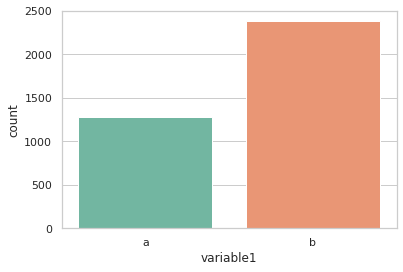

In [85]:
print(' Values for variable1 (a , b ):')
print(data['variable1'].value_counts())
sns.countplot(x='variable1', data=data, palette='Set2')
plt.show()

In [86]:
print('The most common value in "variable1" is %s.' %data['variable1'].value_counts().idxmax())

The most common value in "variable1" is b.


In [87]:
train_data = data.copy()
validation_data = v_data.copy()

In [88]:
def replace_missing_strings_v(final_data,data):
    final_data["variable1"].fillna(data['variable1'].value_counts().idxmax(), inplace=True)
    final_data["variable4"].fillna(data['variable4'].value_counts().idxmax(), inplace=True)
    final_data["variable5"].fillna(data['variable5'].value_counts().idxmax(), inplace=True)
    final_data["variable6"].fillna(data['variable6'].value_counts().idxmax(), inplace=True)
    final_data["variable7"].fillna(data['variable7'].value_counts().idxmax(), inplace=True)

In [89]:
replace_missing_strings_v(train_data,data)

In [90]:
# validation
replace_missing_strings_v(validation_data,v_data)

In [91]:
# Impute the missing values with mean imputation
def replace_numerical(final_data,data):
    final_data['variable2'].fillna(data['variable2'].mean(), inplace=True)
    final_data['variable14'].fillna(data['variable14'].mean(), inplace=True)
    final_data['variable17'].fillna(data['variable17'].mean(), inplace=True)

In [92]:
replace_numerical(train_data,data)

In [93]:
replace_numerical(validation_data,v_data)

# normalization 

In [94]:
features_log_transformed = pd.DataFrame(data = train_data)
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['variable2', 'variable3', 'variable8', 'variable14', 'variable15','variable17','variable19']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19
0,a,0.062707,0.019286,u,g,c,v,0.061404,f,t,1,t,g,0.068966,0.00005,0.068966,0.0
1,b,0.047669,0.011964,y,p,k,v,0.010175,f,f,0,f,s,0.172414,0.00000,0.172414,0.0
2,b,0.263158,0.040179,u,g,ff,ff,0.000000,f,t,1,f,g,0.082759,0.00019,0.082759,0.0
3,a,0.517594,0.047679,u,g,i,o,0.011754,f,f,0,f,g,0.000000,0.00120,0.000000,0.0
4,b,0.279398,0.125000,u,g,k,v,0.017544,f,f,0,t,g,0.200000,0.00000,0.200000,0.0


In [95]:
vfeatures_log_transformed = pd.DataFrame(data = validation_data)

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['variable2', 'variable3', 'variable8', 'variable14', 'variable15','variable17','variable19']

vfeatures_log_minmax_transform = pd.DataFrame(data = vfeatures_log_transformed)
vfeatures_log_minmax_transform[numerical] = scaler.fit_transform(vfeatures_log_transformed[numerical])

# Show an example of a record with scaling applied
display(vfeatures_log_minmax_transform.head(n = 5))

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19
0,b,0.269768,0.298983,u,g,e,bb,0.07925,t,f,0,t,s,0.210,0.0000,0.210,1.0
1,b,0.125925,0.071357,u,g,c,v,0.02700,f,f,0,t,g,0.068,0.0001,0.068,0.0
2,b,0.337005,0.029898,y,p,d,v,0.02925,f,f,0,f,g,0.120,0.0003,0.120,1.0
3,b,0.041098,0.415188,y,p,aa,v,0.00625,t,f,0,f,g,0.060,0.0375,0.060,0.0
4,b,0.141049,0.531593,y,p,aa,v,0.00200,f,f,0,t,g,0.060,0.0475,0.060,1.0


In [96]:
data_final = pd.get_dummies(features_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(data_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
data_final.head()

48 total features after one-hot encoding.


,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,variable4_l,variable4_u,variable4_y,variable5_g,variable5_gg,variable5_p,variable6_W,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,variable6_ff,variable6_i,variable6_j,variable6_k,variable6_m,variable6_q,variable6_r,variable6_x,variable7_bb,variable7_dd,variable7_ff,variable7_h,variable7_j,variable7_n,variable7_o,variable7_v,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,0.062707,0.019286,0.061404,1,0.068966,0.00005,0.068966,0.0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0
1,0.047669,0.011964,0.010175,0,0.172414,0.00000,0.172414,0.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
2,0.263158,0.040179,0.000000,1,0.082759,0.00019,0.082759,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,0.517594,0.047679,0.011754,0,0.000000,0.00120,0.000000,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0
4,0.279398,0.125000,0.017544,0,0.200000,0.00000,0.200000,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0


In [97]:
v_final = pd.get_dummies(vfeatures_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(v_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
v_final.head()

44 total features after one-hot encoding.


,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,variable4_u,variable4_y,variable5_g,variable5_p,variable6_W,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,variable6_ff,variable6_i,variable6_j,variable6_k,variable6_m,variable6_q,variable6_x,variable7_bb,variable7_dd,variable7_ff,variable7_h,variable7_j,variable7_n,variable7_v,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,0.269768,0.298983,0.07925,0,0.210,0.0000,0.210,1.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
1,0.125925,0.071357,0.02700,0,0.068,0.0001,0.068,0.0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0
2,0.337005,0.029898,0.02925,0,0.120,0.0003,0.120,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0
3,0.041098,0.415188,0.00625,0,0.060,0.0375,0.060,0.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
4,0.141049,0.531593,0.00200,0,0.060,0.0475,0.060,1.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0


In [101]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_final, 
                                                    target_raw, 
                                                    test_size = 0.3, 
                                                    random_state = 20)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2590 samples.
Testing set has 1110 samples.


In [102]:
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[  79    0]
 [   0 1031]]


In [117]:

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
Svm = svm.SVC()
Svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
y_pred = Svm.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",Svm.score(X_test,y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[  79    0]
 [   0 1031]]


In [108]:
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [109]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(data_final,target_raw)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}


In [119]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [120]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid_model_result2 = grid.fit(data_final,target_raw)

# Summarize results
best_score, best_params = grid_model_result2.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
